# Latex Headers

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\adagger}[0]{\hat{a}^{\dagger}}$$
$$\newcommand{\ahat}[0]{\hat{a}}$$
$$\newcommand{\bdagger}[0]{\hat{b}^{\dagger}}$$
$$\newcommand{\bhat}[0]{\hat{b}}$$
$$\newcommand{\cdagger}[0]{\hat{c}^{\dagger}}$$
$$\newcommand{\chat}[0]{\hat{c}}$$
$$\newcommand{\ddagger}[0]{\hat{d}^{\dagger}}$$
$$\newcommand{\dhat}[0]{\hat{d}}$$

# Cell Width Adjust

 - Execute the code below to adjust the width of the cells when editing.  
 - These cells will not be published to the book and are for editing convenience.

In [1]:
width = 70 #Width as a percentage of the screen

from IPython.display import display, HTML
display(HTML("<style>.jp-CodeCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-MarkdownCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-Cell-outputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))

# Chapter XX -- Interference: Hong-Ou-Mandel Effect and Homodyne Detection

Many quantum engineering applications leverage the unique properties of quantum light and its interactions with basic optical elements.  For example, many applications will have multiple stages for splitting, propagating, and recombining/interfering photons before final detection.  For instance, a simplified optical implementation of quantum key distribution is shown in the figure below.

**FIXME: Figure for QKD implementation**

Before we can build to larger systems for more functional applications, it is important to understand how how to treat basic building blocks of quantum optical systems.  

In this chapter, we will introduce the concepts of entangled photon pair generation and interference by way of studying the Hong-Ou-Mandel effect.  We will discuss how photons interact with beamsplitters, how to treat their interference, and signal processing methods such as coincidence detection.  

We will also explore the concept of homodyne detection where we leverage the interference between more general quantum states and coherent states to characterize quantum fields.  We will build on this to explore how homodyne detection can be used to performe distance measurements with extremely high sensitivity using squeezed light.  Such techniques were in large part perfected for the detection of gravitational waves, but can be applied more generally at smaller scales.

## Hong-Ou-Mandel Effect

Imagine the scenario depicted in Fig. **FIXME: FIGURE**.  A nonlinear crystal is used to generate precisely two photons of energy $\hbar\omega$ when excited by a pulse with a photon energy of $2\hbar\omega$.  This process is called spontaneous parametric down-conversion and is a common technique for generating entangled photon pairs. 

The two photons travel away from the crystal along two paths (top and bottom as shown).  They are then brought together and interfere within a beamsplitter.  

**FIXME: HONG-OU-MANDEL EXPERIMENTAL SCHEMATIC**

If we break down all the different possibilities that could happen, one would be that both photons output in $c$, another would be that both photons output in $d$, and a final possibility would be that one photon outputs to $c$ while the other outputs to $d$.   One interesting question to ask is whether the delay has any influence over these possibilities?  

Lets model this system.  Imagine that the input signals are pulsed.  In this case we could for instance represent a single photon input with delay $\tau$ in port $a$ as

$$ \ket{1; \tau}_a, $$

or a single photon input with $0$ delay in port $b$ as

$$ \ket{1; 0}_b.$$

The first number represents the numer of photons, the second the delay.  Finally, the subscript represents the mode.  Given a two-photon input to the system from the crystal with delay along path $a$ of $\tau$, the total input state can be written as

$$\ket{\psi_\text{in}} = \ket{1; \tau}_a\ket{1; 0}_b = \adagger_{\tau}\bdagger_0 \ket{0}$$

```{note} We have taken a little liberty here to assign creation and annihilation operators for each mode with their mode label.  It's just a bit of shorthand that is very common to make things easier to read if there are only a handful of modes to deal with.
```

A beamsplitter has the following relationship between the input and output modes:

$$\adagger_\tau \rightarrow \frac{\cdagger_\tau + \ddagger_\tau}{\sqrt{2}},$$

and

$$\bhat_0 \rightarrow \frac{\chat_0 - \dhat_0}{\sqrt{2}},$$

thus, the output state becomes

$$ 
\ket{\psi_\text{out}} = \frac{1}{2}
\bigg \lbrace 
\chat_\tau \chat - \chat_\tau \dhat + 
\dhat_\tau \chat - \dhat_\tau \dhat
\bigg \rbrace
$$

Let's start for the case of $\tau \neq 0$.  In this case we  have that

$$
\ket{\psi_\text{out}} = 
\frac{1}{2}
\bigg\lbrace
\ket{1;\tau}_c\ket{1;0}_c - 
\ket{1;\tau}_c\ket{1;0}_d + 
\ket{1;0}_c\ket{1;\tau}_d -
\ket{1;\tau}_d\ket{1;0})_d
\bigg\rbrace.
$$

Remember that probabilities of outcomes are related to $\bra{\psi_out}\ket{\psi_out}$, thus we can make the following map of outcomes at each detector.

:::{figure-md} HOM-possibilities-w-tau
<img src="./FIGURES/HOM-possibilities-w-tau.png" alt="HOM-w-tau" class="bg-primary mb-1" width="500px">

Four different possibilities of detection in port c and d given a non-zero delay $\tau$.  
:::

All possibilities we oultined above happen with equal probability. 

However, for $\tau = 0$ we have something very interesting, and a bit unintuitive.  In this case we have

$$
\ket{\psi_\text{out}} = 
\frac{\sqrt{2}}{2}
\bigg\lbrace
\ket{2;0}_c -
\ket{2;0}_d
\bigg\rbrace
$$

leading to the following map of outcomes at each detector.

:::{figure-md} HOM-possibilities-wo-tau
<img src="./FIGURES/HOM-possibilities-wo-tau.png" alt="HOM-w-tau" class="bg-primary mb-1" width="500px">

Two different possibilities of detection in port c and d given a zero delay $\tau$ such that the two photons are indistinguishable in every way at the beamsplitter.  Note each pulse now contains two photons, and the probability of each occurance is $1/2$.  
:::

In this case **there would be no coincidence events** (that is, events that would trigger an output on both detectors).  Either both photons go to $c$ or both to $d$ with equal probability.  This is in comparison to the case when the modes were fully separate in time when the coincidence rate is 50%.  

```{important}
We want to emphasize here that we have taken a few liberties with the notation above.  The approach  used here works in estimating probabilities for the two cases discussed, assuming (1) that each photon pulse is long relative to the central frequency; (2) that the envelope shape and central frequency of each pulse is the same; and (3) that for the delayed case the photons are so far separated in time that there is no overlap between each photon pulse at the input of the beamsplitter. For these cases the cases are either perfectly indistinguishible or distinguishable.  A more complete model would actually have to expand each input into the frequency domain and model the interference between each spectral component individually.  However this approach is much more involved.  In the end, both approaches result in the same predictions as discussed above.  
```

## Homodyne Detection

Let's consider a configuration similar to the one used to demonstrate the Hong-Ou-Mandel effect above, but with a few key changes.  First, we can drive on input of the beamsplitter with a coherent state $\ket{\alpha}_a$.  Second, we let the second input be an arbitrary state $\ket{\psi}_b$.  Third, instead of examining coincidence events, we rather examine the subtraction of the photocurrents between ports $d$ and $c$. This configuration is shown pictorally below.

**FIXME: Insert homodyne schematic following description above.**

Given all inputs have the same frequency, this scheme is referred to as a balanced homodyne detection scheme.  It allows us to measure the field observable $B^{(\theta)}$ of the state $\ket{\psi}_b$.  Let's see how.

```{note}
Note that we have again used the convention of labeling all operators with the letter corresponding to the mode label for convenience and clarity.  Thus $B^{(\theta)}$ corresponds to the average observed field of the state in port $b$.  
```

First note that

$$ \chat = \frac{\ahat + \bhat}{\sqrt{2}} $$

and

$$ \dhat = \frac{\ahat - \bhat}{\sqrt{2}}. $$

We then find that we can use these relations to define an operator that represents the difference current between the detector in path $d$ and the one in path $c$.  We can do this by assuming that the detectors are 100% efficient, and thus the current would be directly proportional to the number of photons incident on each one.

$$ 
\hat{I}(\theta) \propto \hat{N}_c - \hat{N}_d = 
\frac{1}{2} 
\bigg \lbrace 
(\adagger + \bdagger)(\ahat + \bhat) - 
(\adagger - \bdagger)(\ahat - \bhat) 
\bigg \rbrace
$$

After a bit of simplfication, we find that 

$$ \hat{I}(\theta) \propto \adagger\bhat + \bdagger\ahat. $$

If we then take the input state to be $\ket{\alpha}_a\ket{\psi}_b$, we have that the average current is expressed as

$$ I(\theta) \propto \bra{\psi}_b \bra{\alpha}_a \adagger \bhat + \ahat \bdagger \ket{\alpha}_a \ket{\psi}_b = |\alpha|\bra{\psi}_b \bhat e^{-i\theta} + \bdagger e^{i\theta} \ket{\psi}_b $$

where we have taken $\alpha = |\alpha|e^{-i\theta}$.

Note that this means that 

$$ I(\theta) \propto 2 |\alpha|B^{(\theta)}, $$

meaning that the measured current can be directly related to the field in B in the quadrature defined by $\theta$.  One can simply scan the phase $\alpha$ (for example by inserting a wedge into the path of $a$) to measure the average field in in $b$ for all relative phase delays.  

Beyond mapping the average field, we can also examine the noise.  To do this, we then need something to correspond to $\hat{I}^2$.  

$$\hat{I}^2(\theta) \propto (\adagger \bhat + \bdagger \ahat)^2.  $$

Again, after some algebra, we wind up finding that 

$$ \langle \hat{I}^2(\theta) \rangle 
\propto 
|\alpha|^2 \bra{\psi}_b e^{i 2 \theta}\bhat\bhat + 1 + 2\bdagger\bhat + \bdagger\bdagger e^{-i2\theta} \ket{\psi_b} + N_b, $$

but, note, this is nothing more than

$$ \langle \hat{I}^2(\theta) \rangle 
\propto 
4 |\alpha|^2 {\hat{B}^{(\theta)}}^2 + N_b$$

Then remember that the noise is simply defined by the standard deviation of the output current, which is

$$ \Delta I(\theta) = \langle \hat{I}^2 \rangle - I^2 \propto 4 |\alpha|^2 \Delta B^{(\theta)}  + N_b $$

This is a really interesting set of results, so let's think about them a bit.  Basically, the signal $I$ is related directly to the field observable of the state in port $b$ for any quadrature defined by $\theta$.  In fact this state information has been enhanced by a factor of $2|\alpha|$ due to the large field of the coherent state.  The the noise of the differential current is simply the noise of the field observable of the state in port $b$ enhanced by a factor of $4|\alpha|^2$, with an extra contribution of $N_b$, the number of photons in the state in port $b$.  Note that if we are dealing with few-photon states, then this extra portion $N_b$ can be safely ignored.  This means, **balanced homodyne detection provides all information about the fields in port $b$**.  

Let's see what happens when we inject a squeezed state into port $b$.

```{note}
Clearly, there is an advantage to having a high intensity coherent state $\ket{\alpha}$.  However, one should note that there are technical limitations here, in particular is detector saturation.  As with any photodetection scheme, there is a limit to the average photon rate that can be detected by a given detector.  There are also bandwidth limitations to be considered.  These traditional limitations of optoelectronics still apply and must be considered.  As with all quantum engineering, there is still plenty of classical engineering to be taken into account!
```

### Homodyne Detection with Squeezed Light

We know from Chapter **FIXME: LINK TO BASICS CHAPTER** that squeezed light exhibits reduced field fluctuations along a particular quadrature.  We also now know that Homodyne detection can measure the field observable at input port $b$ along any quadratudre defined by the phase of the coherent state $\theta$.  

Let us start by referring back to the simplified squeezed state we had discussed in **FIXME: LINK TO SQUEEZED STATE SECTION**

$$ \ket{\psi_s}_b = \sqrt{1 - s^2}\ket{0}_b - s\ket{2}_b.$$

From our prior analysis we know that the average field is zero for this squeezed state, thus

$$ I(\theta) \propto 2 |\alpha| B^{(\theta)} = 0,$$

and that the current noise can be expressed as

$$ \Delta I(\theta) \propto 4 |\alpha|^2 {\hat{B}^{(\theta)}}^2 + N_b
$$  

which, for our squeezed state is 

$$  \Delta I(\theta) = 4 |\alpha|^2 { \bigg \lbrace 1/4 - s \sqrt{\frac{(1 - s^2)}{2}} \cos(2 \theta) + s^2 \bigg \rbrace  }^{1/2} + N_b $$

As noted above, for a large enough $|\alpha|$, we can ignore $N_b$ here.

Let's now plot $\Delta I(\theta)$ given $s = 0.3$ (squeezed state) and $s = 0.0$ (vacuum state -- no input).

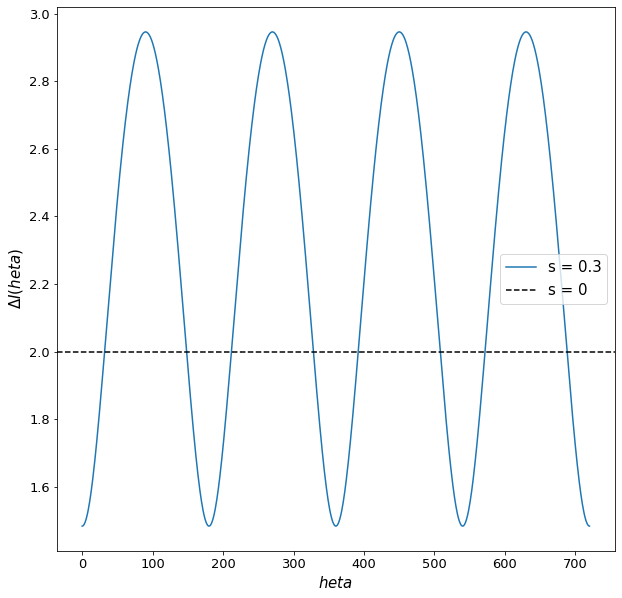

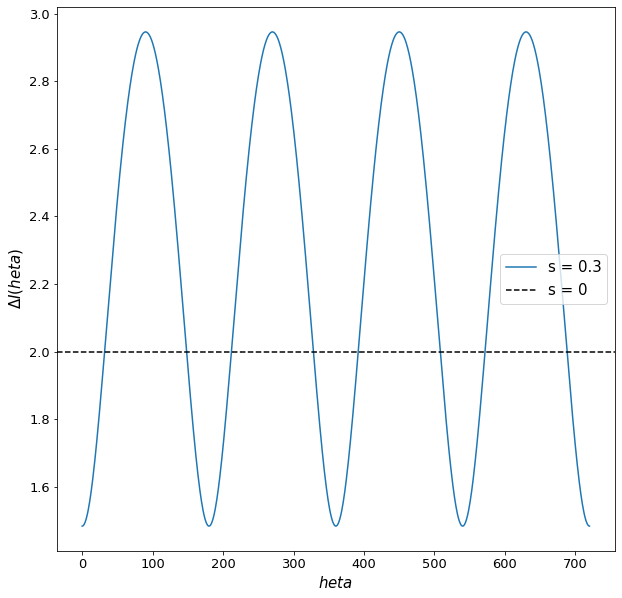

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from myst_nb import glue

fig = plt.figure()
ax = fig.add_subplot()


s = 0.3
theta = np.linspace(0, 4*np.pi, 1000)
delA = 4*np.sqrt(1/4 - s*np.sqrt((1 - s**2)/2)*np.cos(2*theta) + s**2)

ax.plot(theta*180/np.pi, delA, label="s = 0.3")
ax.axhline(2.0, color="black", linestyle="--", label="s = 0")

#ax.set_ylim(0, 1.55)
ax.set_xlabel('$\theta$', fontsize=15)
ax.set_ylabel('$\Delta I(\theta)$', fontsize=15)
ax.tick_params(labelsize=13) 
ax.legend(fontsize=15)
    
#plt.gca().set_aspect('equal')

fig.set_size_inches(10, 10)

glue("homodyne_noise_squeezed_state", fig, display=False)

```{glue:figure} homodyne_noise_squeezed_state
:figwidth: 600px
:name: "fig-homodyne-noise-squeezed-state"

Noise of the differential output signal $\Delta I$ as we scan $\theta$.  Note that depending on the value of $\theta$ with the squeezed state input, the noise can be either significantly increased or decreased compared to the case of no input to port $b$ (i.e. pure vacuum state input corresponding to $s = 0$).  
```

## References

```{bibliography}
:style: unsrt
```